# Rooftop Solar Potential Optimization for Sustainable Energy in Nairobi

## Business Understanding

The project addresses a real-world problem faced by Nairobi residents and businesses due to frequent unprojected power outages from the Kenya Power Lighting Company (KPLC). This problem creates a demand for alternative energy sources, with solar power being a viable option. However, there is a lack of a systematic approach to harness the solar potential of individual buildings in Nairobi.


## Problem Statement

There is a lack of a systematic approach for harnessing the solar potential of individual buildings in Nairobi. This is exacerbated by multiple unprojected power outages from KPLC, leading to increased interest in alternative energy sources. The primary issues include an absence of precise insights into suitable areas for solar installations and the lack of leveraging a vector dataset containing building footprints in Nairobi.

## Objectives

1. **Rooftop Solar Potential Prediction:**
  - Utilize machine learning techniques to predict suitable rooftop areas, installable capacity, and estimated yearly energy potential for each building unit.
  - Incorporate features such as building type, estimated tilt, and building height in the predictive models.


2. **Optimization Strategies:**
   - Implement algorithms to identify the most efficient rooftop solar installations.
   - Develop strategies for maximizing solar potential while respecting building characteristics.
   - Conduct a basic cost-benefit analysis considering unit installation prices to determine the economic viability of rooftop solar installations for different building types.

3. **User-Friendly Interface:**
   - Develop a user-friendly interface for stakeholders to interact with the system.
   - Enable users to input building characteristics and receive real-time recommendations for optimal rooftop solar installations.

### Stakeholders

- **Property Owners and Managers:**
  - Seek insights into the solar potential of their buildings.
  - Need guidance on optimizing rooftop solar installations for sustainable energy planning and cost-effective solar projects.

- **Solar Installation Companies:**
  - Interested in identifying and prioritizing buildings with high solar potential for targeted marketing.
  - Utilizing the system to streamline sales efforts and optimize project planning.

- **Energy Regulatory Authorities:**
  - Aim to promote sustainable energy practices in the city.
  - Can leverage insights for policy formulation and incentive programs to encourage rooftop solar adoption.


## Limitations of the Study

- **Geographical Specificity:**
  - The system's effectiveness may be limited to Nairobi and may not be directly applicable to other regions with different geographic characteristics.
  
- **Data Dependency:**
  - The accuracy of predictions relies on the availability and accuracy of building footprint data and other relevant datasets.

- **Regulatory Variability:**
  - Different regions may have varying regulations affecting solar installations, which may not be fully considered in the system.

- **Assumed Data Quality:**
  - Assumptions about the quality of input data, including building characteristics and geographical information, may impact the accuracy of predictions.

## Success Metrics

- **Prediction Accuracy:**
  - Root Mean Squared Error (RMSE) and the Mean Squared Error (MSE) should be as low as possible

- **User Engagement:**
  - Evaluate user interaction with the system's interface, ensuring it meets the needs of stakeholders.

- **Cost-Benefit Analysis Insights:**
  - Assess the effectiveness of the system in providing valuable insights for economic decision-making in rooftop solar installations.




In [137]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import learning_curve

import joblib


# Data Understanding

In [138]:
#load and read the data
data  = pd.read_csv("data/nairobi_rooftop_solar_potential.csv")
data

/Users/esthernyawera/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,87100c54-0648-4e73-97f0-3a346c068231,Nairobi,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00,NaN,NaN
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,Nairobi,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98,NaN,NaN
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,Nairobi,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72,NaN,NaN
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,Nairobi,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60,NaN,NaN
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,Nairobi,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
272746,05f945d2-946f-4079-9108-2b0e23328bbe,Nairobi,36.78,0.00,0.00,0.00,single family residential,11.97,2.55,NaN,NaN,NaN
272747,b66554f5-173c-46d0-80c0-19b5e3ef04ab,Nairobi,181.87,109.44,21.23,31274.44,single family residential,18.37,3.04,1473.00,NaN,NaN
272748,abb75046-2851-4c62-a123-7d052a098c7b,Nairobi,164.34,94.38,18.31,27153.65,single family residential,9.59,4.59,1483.00,NaN,NaN
272749,d5238d1b-b7f1-47ed-bda8-7d815cee01d4,Nairobi,173.43,99.64,19.33,27911.63,single family residential,16.14,4.92,1444.00,NaN,NaN


## Data Description

The provided dataset contains information about building structures and their suitability for solar panel installation. Below is a detailed description of each column in the dataset, including unit information:


1. **uuid:**
   - *Type:* Unique identifier
   - *Description:* Unique ID assigned to each building structure polygon in the dataset.

2. **city:**
   - *Type:* Categorical
   - *Description:* Indicates the study area or city where the building is located.

3. **Surface_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Represents the surface area of the building, providing spatial information for solar potential assessment.

4. **Potential_installable_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Indicates the potential rooftop area suitable for solar panel installation, contributing to the overall solar capacity.

5. **Peak_installable_capacity:**
   - *Type:* Numeric (in kilowatt peak - kWp)
   - *Description:* Represents the estimated peak installable capacity based on the suitable rooftop area. This is a crucial factor in determining the potential power generation.

6. **Energy_potential_per_year:**
    - *Type:* Numeric (in kilowatt-hours - kWh)
   - *Description:* Provides an estimate of the yearly energy potential of the rooftop

7. **Assumed_building_type:**
   - *Type:* Categorical
   - *Description:* Describes the use type of the building (e.g., single family residential, commercial ).

8. **Estimated_tilt:**
   - *Type:* Numeric
   - *Description:* Represents the estimated tilt of the rooftop, a significant factor influencing the efficiency of solar panels in capturing sunlight.

9. **Estimated_building_height:**
   - *Type:* Numeric
   - *Description:* Provides an estimate of the building height, offering additional information about the structure that may impact solar potential.

10. **Estimated_capacity_factor:**
   - *Type:* Numeric
   - *Description:* The estimated capacity factor is a measure of the efficiency of a solar installation, considering various factors such as available space, structural integrity, shading, and local regulations. It represents the ratio of the actual electrical output over a specific period to the maximum possible output if the system operated at full capacity. A higher capacity factor indicates a more efficient and reliable solar installation.


### Unit Information

- *suitable_area:* Square meters (m2)
- *installable_capacity:* Kilowatt peak (kWp)
- *potential:* Kilowatt-hours (kWh)

**Note:**
- The dataset is based on GeoEye 1 imagery acquired in 2020.
- This information allows for the analysis of rooftop solar potential, installable capacity, and estimated yearly power potential for each building in the study area.


## Data Cleaning


In [139]:
#removing the irrelevant columns 
data.drop(columns=["Comment", "Unit_installation_price","City"],inplace=True)

data.head()

,uuid,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,87100c54-0648-4e73-97f0-3a346c068231,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00


In [140]:
def display_data_understanding(dataframe):
    """
    Displays basic information about the provided DataFrame.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to analyze.
    """
    # Basic information about the DataFrame
    print("Basic Information:")
    print(dataframe.info())

    # Descriptive statistics for numeric columns
    print("\nDescriptive Statistics for Numeric Columns:")
    print(dataframe.describe())

    # Shape of the DataFrame
    print("\nShape of the DataFrame:")
    print(dataframe.shape)

    # Missing values in each column
    print("\nMissing Values:")
    print(dataframe.isnull().sum())


# Call the function with your dataset
display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272751 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272751 non-null  object 
 1   Surface_area                272751 non-null  float64
 2   Potential_installable_area  272751 non-null  float64
 3   Peak_installable_capacity   272751 non-null  float64
 4   Energy_potential_per_year   272751 non-null  float64
 5   Assumed_building_type       272751 non-null  object 
 6   Estimated_tilt              272751 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   269249 non-null  float64
dtypes: float64(7), object(2)
memory usage: 18.7+ MB
None

Descriptive Statistics for Numeric Columns:
        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272751.000000               272751.000000   

### Missing Values:
- The columns 'Estimated_building_height' and 'Estimated_capacity_factor' have missing values.
  
#### Estimated_building_height:
- There are 30 missing values in the 'Estimated_building_height' column. These missing values need to be addressed, as this information is crucial for assessing the physical characteristics of buildings.

#### Estimated_capacity_factor:
- The 'Estimated_capacity_factor' column has 3,502 missing values. These missing entries may impact the accuracy of the capacity factor calculations, and imputation or other strategies may be considered to handle these missing values.

Inorder to decide whether to impute the values in the `Estimated_capacity_factor` we check the distribution of this data using a histogram inorder to decide whether to use the mean or median

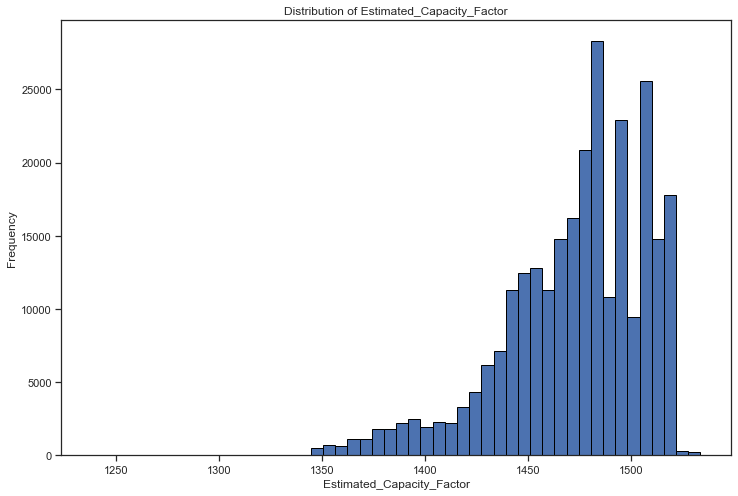

In [141]:
# Visualize the distribution using a histogram
plt.hist(data["Estimated_capacity_factor"].dropna(),
         bins=50, edgecolor='black')
plt.title('Distribution of Estimated_Capacity_Factor')
plt.xlabel('Estimated_Capacity_Factor')
plt.ylabel('Frequency')
plt.show()


Given the distribution of the `Estimated_Capacity_Factor` column, it appears to be right-skewed. In such cases, using the **median** for imputation is generally more appropriate. This is because the median is less sensitive to outliers and skewed data, providing a more robust measure of central tendency. Therefore, in this case, median imputation would be a better method.

In [142]:
# Drop rows with missing values in Estimated_Building_Height
data.dropna(subset=['Estimated_building_height'], inplace=True)

# Impute missing values in Estimated_Capacity_Factor


data["Estimated_capacity_factor"].fillna(
    data["Estimated_capacity_factor"].median(), inplace=True)


display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 272721 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272721 non-null  object 
 1   Surface_area                272721 non-null  float64
 2   Potential_installable_area  272721 non-null  float64
 3   Peak_installable_capacity   272721 non-null  float64
 4   Energy_potential_per_year   272721 non-null  float64
 5   Assumed_building_type       272721 non-null  object 
 6   Estimated_tilt              272721 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   272721 non-null  float64
dtypes: float64(7), object(2)
memory usage: 20.8+ MB
None

Descriptive Statistics for Numeric Columns:
        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272721.000000               272721.000000   

The missing/null values have already been handled as seen in the output provided above now we check for duplicates.

In [143]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


####  Check for Outliers

After examining the dataset for potential duplicates, the next step is to explore the presence of outliers in the data. Outliers can significantly impact the accuracy of statistical analyses and machine learning models. To identify potential outliers, a boxplot analysis will be conducted.

##### Boxplot Analysis:

A boxplot provides a visual representation of the distribution of data and helps identify any extreme values, also known as outliers. Each boxplot displays the interquartile range (IQR), with outliers plotted as individual points beyond the whiskers.

The following steps will be taken to check for outliers:

1. **Boxplot Visualization:**
   - A boxplot will be generated for each numeric column in the dataset to visualize the spread of values and identify any data points that fall outside the expected range.

2. **Outlier Identification:**
   - Outliers will be identified based on their position outside the whiskers of the boxplot. These data points may require further investigation and consideration in subsequent analyses.

This process aims to ensure the robustness of the data by addressing potential outliers, contributing to a more reliable and accurate interpretation of the dataset.



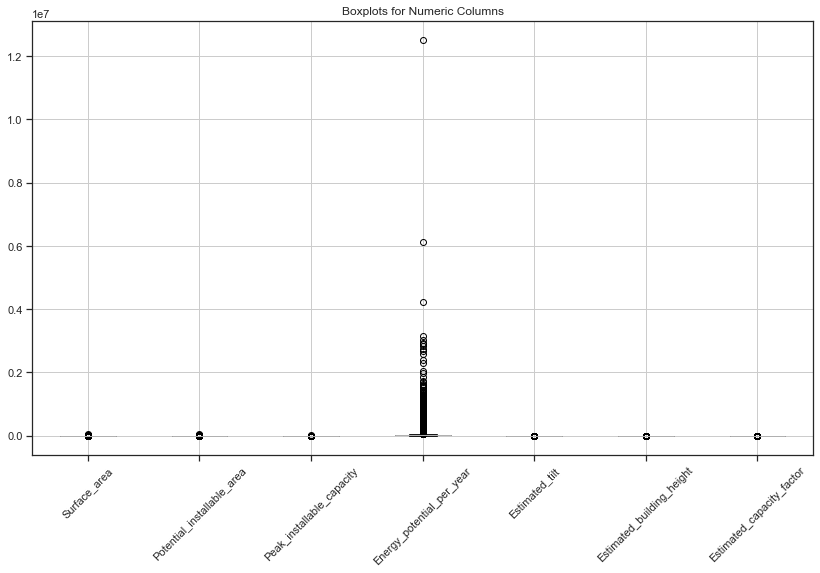

In [144]:
# Select numeric columns for boxplots
numeric_columns = data[['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                        'Energy_potential_per_year', 'Estimated_tilt', 'Estimated_building_height',
                        'Estimated_capacity_factor']]


# Create boxplots using matplotlib
plt.figure(figsize=(14, 8))
numeric_columns.boxplot(rot=45)
plt.title('Boxplots for Numeric Columns')
plt.show()

It seems that there are outliers in the `Energy_potential_per_year` column.Given the domain-specific rules for energy consumption in buildings, it's essential to understand the context and potential factors that could lead to outliers in the `Energy_potential_per_year` column. Here are a few potential reasons:

1. **Building Type Variation:**
   - Different building types may have significantly different energy needs. For example, industrial facilities typically consume more energy compared to residential or commercial buildings. If the dataset includes various building types, this could contribute to variations in energy potential.

2. **Specialized Functions:**
   - Buildings with specialized functions or equipment may exhibit higher energy potential. For instance, buildings hosting data centers, manufacturing units, or heavy machinery might require more energy for their operations.

3. **Geographical Variances:**
   - Geographic location can impact energy potential. Buildings in regions with extreme weather conditions might have higher energy needs for heating or cooling. Additionally, renewable energy potential, such as solar energy, can vary based on location.


# EDA

In [145]:
data.Assumed_building_type.value_counts(normalize=True)

single family residential    0.667723
multi-family residential     0.138512
commercial                   0.058657
public                       0.053359
industrial                   0.046109
peri-urban settlement        0.035641
Name: Assumed_building_type, dtype: float64

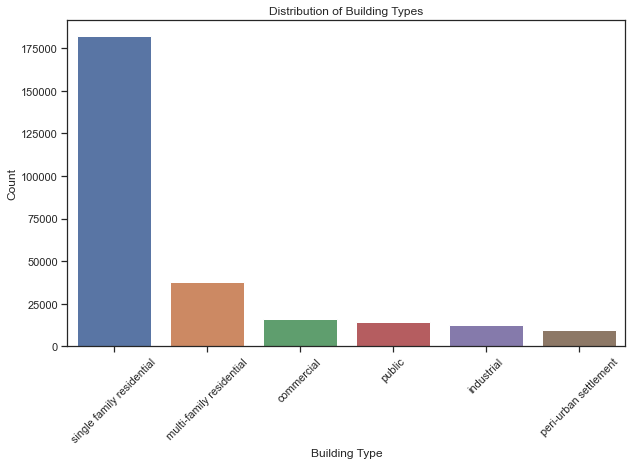

In [146]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Assumed_building_type'],
              order=data['Assumed_building_type'].value_counts().index)

# Add title and labels
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

The distribution of building types in the dataset is presented below:

- **Single Family Residential:** 66.77%
- **Multi-Family Residential:** 13.85%
- **Commercial:** 5.87%
- **Public:** 5.34%
- **Industrial:** 4.61%
- **Peri-Urban Settlement:** 3.56%

### Interpretation:

- **Single Family Residential:** The majority of the buildings in the dataset, constituting approximately 66.77%, are categorized as single-family residential units. This suggests a predominant representation of individual homes.

- **Multi-Family Residential:** Around 13.85% of the buildings fall under the multi-family residential category, indicating a presence of structures designed to accommodate multiple households.

- **Commercial:** Approximately 5.87% of the buildings are classified as commercial, suggesting a presence of business or retail establishments.

- **Public:** Representing 5.34%, public buildings such as government facilities, schools, or community centers are a notable category in the dataset.

- **Industrial:** With a share of 4.61%, industrial buildings are present, likely indicating manufacturing or production facilities.

- **Peri-Urban Settlement:** The category of peri-urban settlements comprises about 3.56% of the dataset. This suggests a representation of buildings located on the outskirts of urban areas.

Understanding the distribution of building types is crucial for contextualizing the dataset and gaining insights into the predominant property characteristics and potential solar energy adoption patterns.


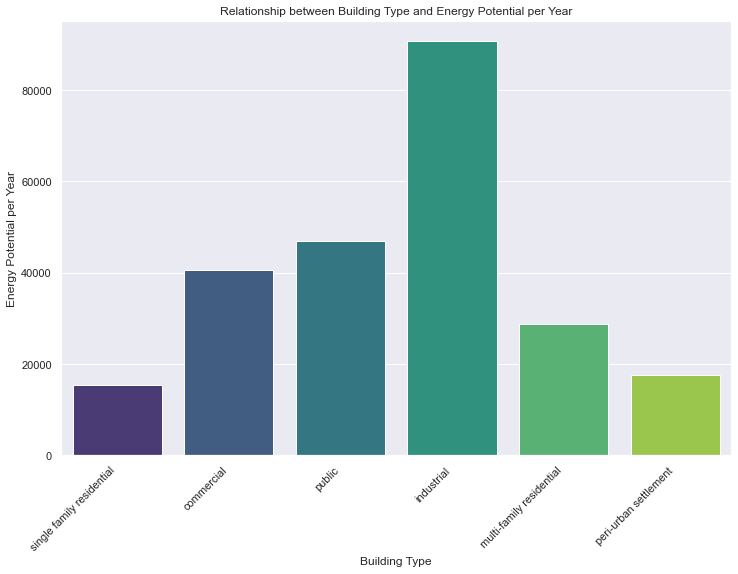

In [147]:

# Barplot showing the relationship between building type and energy potential per year

sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='Assumed_building_type', y='Energy_potential_per_year',
            data=data, ci=None, palette='viridis', capsize=0.2, errwidth=2, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Building Type and Energy Potential per Year')
plt.xlabel('Building Type')
plt.ylabel('Energy Potential per Year')
plt.show()

The provided bar graph visually represents the energy potential per year across various building types. Let's interpret the key insights derived from the plot:

#### Interpretation of the Bar Plot:

- **Industrial:** Industrial buildings exhibit the highest energy potential, reaching close to 80,000 KWh per year.

- **Public:** Public buildings, such as libraries or museums, have the second-highest energy potential.

- **Commercial:** Commercial buildings used for business purposes rank third in terms of energy potential.

- **Multi-family Residential:** Buildings accommodating multiple families (e.g., apartments) show a lower energy potential compared to commercial structures.

- **Single Family Residential:** Standalone houses designed for one family demonstrate a lower energy potential than multi-family residential buildings.

- **Peri-urban settlement:** Buildings within specific areas dedicated to particular purposes or groups display the lowest energy potential.


# Data Preprocessing

In [148]:
#Encoding the Assumed Building Type
df = data.copy()

freq_encoding = data['Assumed_building_type'].value_counts(normalize=True)

df['Assumed_building_type_freq_encoded'] = df['Assumed_building_type'].map(
    freq_encoding)



df = df.drop(columns = ["uuid","Assumed_building_type"])
df.head()

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Assumed_building_type_freq_encoded
0,204.53,77.27,14.99,21720.76,14.11,9.09,1449.00,0.667723
1,1113.35,676.13,131.17,182191.10,21.81,5.57,1388.98,0.667723
2,577.24,412.30,79.99,115637.95,16.34,5.78,1445.72,0.667723
3,28.58,14.17,2.75,3723.02,23.71,4.04,1354.60,0.667723
4,19.03,6.19,1.20,1655.39,22.91,5.31,1378.00,0.667723


**Advantages of Frequency Encoding Over One-Hot Encoding**

Frequency encoding is chosen over one-hot encoding for categorical variables due to several advantages, especially in the context of addressing multicollinearity issues:

1. **Dimensionality Reduction:**
   - **Frequency Encoding:** Reduces the dimensionality of categorical variables by representing each category with its frequency.
   - **One-Hot Encoding:** Creates binary features for each category, potentially leading to a high-dimensional and sparse dataset.

2. **Multicollinearity Mitigation:**
   - **Frequency Encoding:** Mitigates multicollinearity, as it avoids introducing numerous binary features that may be highly correlated.
   - **One-Hot Encoding:** Prone to multicollinearity, especially when there are high correlations among the binary features.

3. **Preservation of Relative Information:**
   - **Frequency Encoding:** Preserves the relative information about the occurrence of each category, offering a more informative representation.
   - **One-Hot Encoding:** Treats each category as completely independent, potentially overlooking the frequency-related insights.

4. **Handling Rare Categories:**
   - **Frequency Encoding:** Effectively handles rare categories by encoding them based on their frequency, reducing noise in the dataset.
   - **One-Hot Encoding:** Rare categories may lead to sparse matrices with many zero values, potentially introducing noise.

5. **Interpretability in Modeling:**
   - **Frequency Encoding:** Enhances interpretability in linear models by providing interpretable coefficients directly related to the impact of each category on the outcome, weighted by its frequency.
   - **One-Hot Encoding:** Coefficients in one-hot encoding can be less interpretable, especially when dealing with a large number of binary features.

**Interpreting Frequency Encoding in Modeling:**

When using frequency encoding in modeling, focus on the resulting coefficients for each category in linear models. Higher coefficients indicate a stronger positive or negative impact on the outcome variable, taking into account the frequency of each category. Additionally, consider the reduced dimensionality and multicollinearity mitigation aspects when assessing the overall model performance.


In [149]:
nets_df = df.copy()

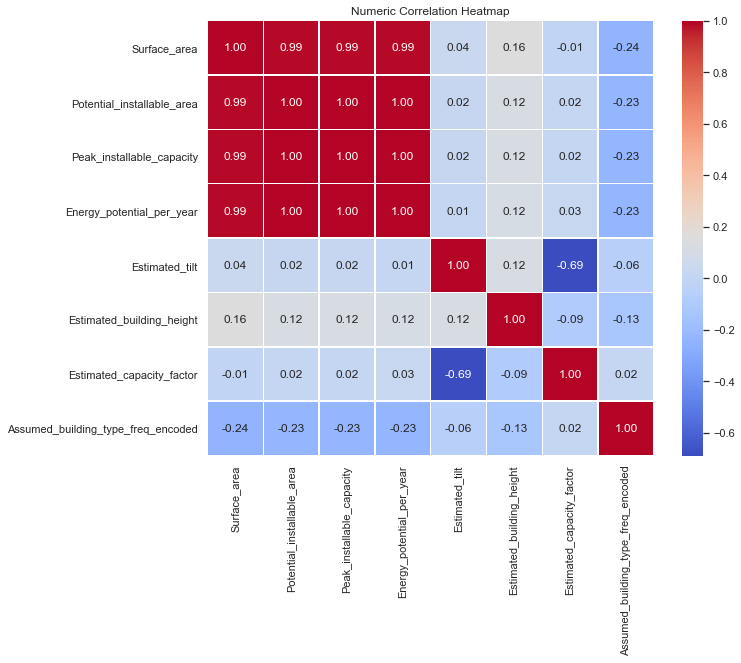

In [150]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

**Correlation Matrix:**

The correlation matrix provides insights into the relationships between the selected columns. Here's a summarized overview:

- **Surface_area:**
  - Positive Correlations:
    - Potential_installable_area (0.988)
    - Peak_installable_capacity (0.988)
    - Energy_potential_per_year (0.987)
  - Weak Positive Correlations:
    - Estimated_tilt (0.042)
    - Estimated_building_height (0.160)
    - Estimated_capacity_factor (-0.005)
    - Assumed_building_type_freq_encoded (-0.245)

- **Potential_installable_area:**
  - Positive Correlations:
    - Surface_area (0.988)
    - Peak_installable_capacity (1.000)
    - Energy_potential_per_year (0.999)
  - Weak Positive Correlations:
    - Estimated_tilt (0.019)
    - Estimated_building_height (0.118)
    - Estimated_capacity_factor (0.017)
    - Assumed_building_type_freq_encoded (-0.231)

- **Peak_installable_capacity:**
  - Positive Correlations:
    - Surface_area (0.988)
    - Potential_installable_area (1.000)
    - Energy_potential_per_year (0.999)
  - Weak Positive Correlations:
    - Estimated_tilt (0.019)
    - Estimated_building_height (0.118)
    - Estimated_capacity_factor (0.017)
    - Assumed_building_type_freq_encoded (-0.231)

- **Energy_potential_per_year:**
  - Positive Correlations:
    - Surface_area (0.987)
    - Potential_installable_area (0.999)
    - Peak_installable_capacity (0.999)
  - Weak Positive Correlations:
    - Estimated_tilt (0.014)
    - Estimated_building_height (0.116)
    - Estimated_capacity_factor (0.026)
    - Assumed_building_type_freq_encoded (-0.229)

- **Estimated_tilt:**
  - Weak Positive Correlations with all other columns (ranging from 0.014 to 0.122)

- **Estimated_building_height:**
  - Weak Positive Correlations:
    - Surface_area (0.160)
    - Potential_installable_area (0.118)
    - Peak_installable_capacity (0.118)
    - Energy_potential_per_year (0.116)

- **Estimated_capacity_factor:**
  - Weak Positive Correlation with Energy_potential_per_year (0.026)
  - Notable Negative Correlation with Estimated_tilt (-0.688)

- **Assumed_building_type_freq_encoded:**
  - Weak Positive Correlation with Estimated_capacity_factor (0.017)
  - Notable Negative Correlations:
    - Surface_area (-0.245)
    - Potential_installable_area (-0.231)
    - Peak_installable_capacity (-0.231)
    - Energy_potential_per_year (-0.229)


In [151]:

def calculate_vif(data_frame):
    """
    Calculate VIF for each predictor variable in a DataFrame.

    Parameters:
    - data_frame (pd.DataFrame): The DataFrame containing predictor variables.

    Returns:
    - pd.DataFrame: A DataFrame showing the VIF for each variable.
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(
        data_frame.values, i) for i in range(data_frame.shape[1])]

    return vif_data


# Assuming 'numeric_columns' is your DataFrame with numeric predictors
vif_result = calculate_vif(df)
print(vif_result)

                             Variable           VIF
0                        Surface_area  6.855948e+01
1          Potential_installable_area  4.787747e+06
2           Peak_installable_capacity  4.786911e+06
3           Energy_potential_per_year  2.812961e+03
4                      Estimated_tilt  5.237537e+00
5           Estimated_building_height  1.715005e+00
6           Estimated_capacity_factor  9.511422e+00
7  Assumed_building_type_freq_encoded  4.281507e+00


## Variance Inflation Factor (VIF) Analysis

### Why VIF?
VIF is a statistical measure used to identify the presence of multicollinearity among predictor variables in a regression analysis. Multicollinearity occurs when two or more independent variables in a model are highly correlated, making it challenging to determine their individual contributions to the dependent variable. VIF helps to assess the severity of multicollinearity by quantifying how much the variance of an estimated regression coefficient is increased due to correlation with other predictors.

##### VIF Summary for Predictor Variables:

1. **Surface_area:**
   - VIF: 68.56
   - **Interpretation:** Moderate level of multicollinearity, suggesting some correlation with other predictor variables.

2. **Potential_installable_area:**
   - VIF: 4,787,747
   - **Interpretation:** Severe multicollinearity, indicating high correlation with other predictors. Consider addressing this issue.

3. **Peak_installable_capacity:**
   - VIF: 4,786,911
   - **Interpretation:** Severe multicollinearity, similar to Potential_installable_area. Attention required to mitigate this issue.

4. **Energy_potential_per_year:**
   - VIF: 2,812.96
   - **Interpretation:** High multicollinearity, suggesting significant correlation with other predictor variables.

5. **Estimated_tilt:**
   - VIF: 5.24
   - **Interpretation:** Moderate level of multicollinearity for Estimated_tilt, indicating some correlation with other predictors.

6. **Estimated_building_height:**
   - VIF: 1.72
   - **Interpretation:** Low multicollinearity for Estimated_building_height, suggesting lower correlation with other predictors.

7. **Estimated_capacity_factor:**
   - VIF: 9.51
   - **Interpretation:** Moderate level of multicollinearity for Estimated_capacity_factor, suggesting some correlation with other predictors.

8. **Assumed_building_type_freq_encoded:**
   - VIF: 4.28
   - **Interpretation:** Moderate level of multicollinearity for Assumed_building_type_freq_encoded, indicating some correlation with other predictors.

#### Action Steps:
- **High VIF (e.g., Potential_installable_area, Peak_installable_capacity):** Consider excluding one of the highly correlated variables or exploring dimensionality reduction techniques to address multicollinearity.
- **Moderate VIF (e.g., Energy_potential_per_year, Estimated_capacity_factor):** Monitor and assess the impact on model interpretation. Consider additional diagnostics and potential variable transformations if necessary.
- **Low VIF (e.g., Estimated_building_height):** These variables have lower multicollinearity and are less likely to impact the reliability of coefficient estimates.

It's crucial to interpret VIF values in the context of the specific modeling goals and consider appropriate actions to ensure the robustness of the regression model.


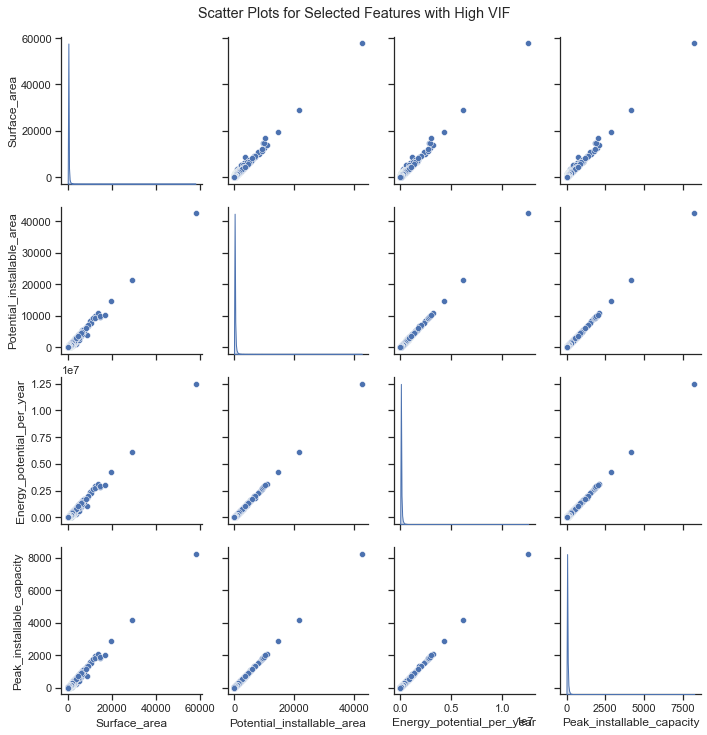

In [152]:
# Select a subset of features for scatter plots
scatter_features = df[[
    'Surface_area', 'Potential_installable_area', 'Energy_potential_per_year',"Peak_installable_capacity"]]

# Create scatter plots
sns.set(style="ticks")
sns.pairplot(scatter_features, kind="scatter", diag_kind="kde")
plt.suptitle('Scatter Plots for Selected Features with High VIF', y=1.02)
plt.show()

The pair plot reveals correlations among key variables, such as Surface Area, Potential Installable Area, Peak Installable Capacity, and Energy Potential per Year, especially focusing on instances with high Variance Inflation Factor (VIF). Analyzing these relationships helps identify strong positive correlations between certain pairs of variables. Understanding these correlations aids in recognizing multicollinearity issues, which is crucial for addressing high VIF values.

 By observing the patterns in the pair plot, one can gain insights into potential redundancies and dependencies among variables, facilitating informed decisions on which features to consider for removal in order to mitigate multicollinearity and improve model stability.

In [153]:
# Apply sqrt transformation to variables with high VIF
df['sqrt_peak_installable_capacity'] = np.sqrt(df['Peak_installable_capacity'])
df['sqrt_estimated_capacity_factor'] = np.sqrt(df['Estimated_capacity_factor'])
df['sqrt_potential_installable_area'] = np.sqrt(
    df['Potential_installable_area'])


# Drop the original columns
df = df.drop(['Peak_installable_capacity',
             'Estimated_capacity_factor', 'Potential_installable_area'], axis=1)
df  = df.drop(columns=["sqrt_peak_installable_capacity","Surface_area"])
calculate_vif(df)

,Variable,VIF
0,Energy_potential_per_year,3.136789
1,Estimated_tilt,5.076003
2,Estimated_building_height,1.617827
3,Assumed_building_type_freq_encoded,4.526053
4,sqrt_estimated_capacity_factor,14.803021
5,sqrt_potential_installable_area,9.666031


### Applying sqrt Transformation to Mitigate High VIF Values

To address the issue of high Variance Inflation Factor (VIF) values in certain predictor variables, a square root transformation has been applied. High VIF values suggest multicollinearity, indicating strong correlations between predictor variables, which can lead to instability in regression models.

#### Transformation Steps:

1. **Sqrt Transformation:**
   - `sqrt_peak_installable_capacity`: Square root transformation applied to the original `Peak_installable_capacity` variable.
   - `sqrt_estimated_capacity_factor`: Square root transformation applied to the original `Estimated_capacity_factor` variable.
   - `sqrt_potential_installable_area`: Square root transformation applied to the original `Potential_installable_area` variable.

2. **Dropping Original Columns:**
   - The original columns (`Peak_installable_capacity`, `Estimated_capacity_factor`, `Potential_installable_area`, and `Surface_area`) with high VIF values are dropped from the dataset.

3. **Calculating VIF Again:**
   - After the transformations, the Variance Inflation Factor (VIF) can be recalculated to assess the effectiveness of the square root transformation in reducing multicollinearity.


The goal of this transformation is to reduce the correlation between predictor variables, making them more independent and mitigating the issues associated with multicollinearity. It aims to improve the stability and interpretability of regression models by providing less correlated predictors.

**Note:** It's essential to carefully monitor the impact of transformations on the overall model performance and interpretability.


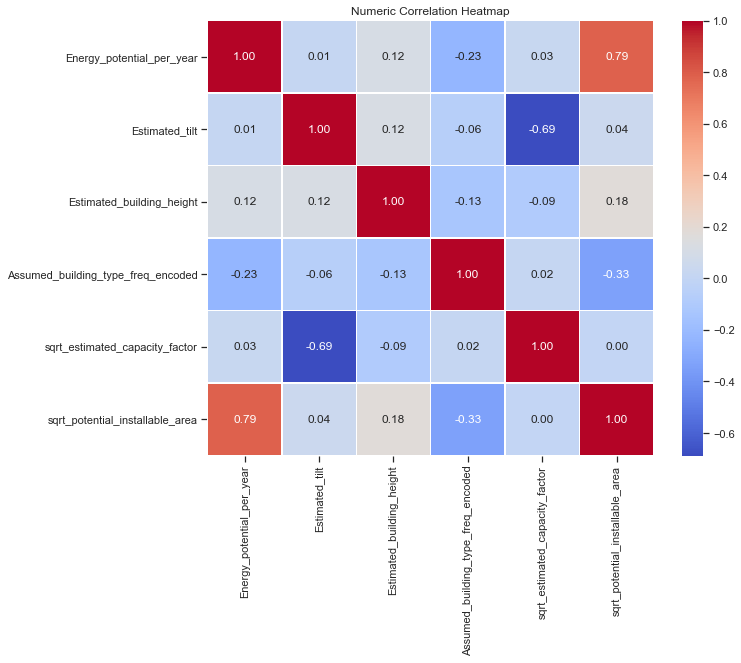

In [154]:
correlation_matrix2 = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

#### Interpretation of Correlation Matrix

The correlation matrix provides insights into the relationships between selected numeric columns. Here's a summarized interpretation:

##### Strong Positive Correlations:
- **Energy_potential_per_year with sqrt_potential_installable_area (0.79):**
  - A strong positive correlation indicates that as the square root of potential installable area increases, the energy potential per year tends to increase significantly.

##### Moderate Positive Correlations:
- **Energy_potential_per_year with Estimated_building_height (0.12):**
  - A moderate positive correlation suggests a modest association between estimated building height and energy potential per year.

##### Weak Positive Correlations:
- **Energy_potential_per_year with Estimated_tilt (0.01):**
  - A weak positive correlation implies a minimal association between estimated tilt and energy potential per year.
- **sqrt_potential_installable_area with Estimated_building_height (0.18):**
  - A weak positive correlation suggests a slight association between the square root of potential installable area and estimated building height.

##### Notable Negative Correlations:
- **Energy_potential_per_year with Assumed_building_type_freq_encoded (-0.23):**
  - A notable negative correlation indicates that as the frequency-encoded assumed building type increases, the energy potential per year tends to decrease.

- **Estimated_tilt with sqrt_estimated_capacity_factor (-0.69):**
  - A notable negative correlation suggests that as the square root of estimated capacity factor increases, the estimated tilt tends to decrease.

##### Other Observations:
- **sqrt_estimated_capacity_factor with sqrt_potential_installable_area (0.00):**
  - A near-zero correlation suggests little association between the square root of estimated capacity factor and the square root of potential installable area.

Overall, it's essential to interpret these correlations cautiously, keeping in mind that correlation does not imply causation. Further analysis may be required to understand the underlying dynamics between these variables.


# Model Selection and Training

## Overview
In this phase, we explore two prominent ensemble learning algorithms known for their robustness to multicollinearity: Random Forest and eXtreme Gradient Boosting (XGBoost). These models are particularly suited for our task due to their ability to handle high-dimensional datasets and their inherent resistance to overfitting, which is crucial when dealing with correlated features.

### Random Forest
Random Forest is a versatile ensemble learning method that operates by constructing multiple decision trees at training time and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. We tune the hyperparameters such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum samples required to split an internal node (min_samples_split). These parameters were optimized using cross-validation to balance bias and variance, ensuring the model generalizes well to unseen data.

### Extreme Gradient Boosting (XGBoost)
XGBoost is an advanced gradient boosting framework that builds upon the concept of boosting by introducing several enhancements that make it more flexible and powerful. We fine-tuned hyperparameters such as the learning rate (eta), the number of trees (n_estimators), and the maximum depth of the trees (max_depth). The regularization parameters were also adjusted to prevent overfitting (reg_alpha for L1 regularization and reg_lambda for L2 regularization). Our objective was to maximize the performance on a validation set to ensure that the model is both accurate and generalizable.

## Target Variable
Our target variable is `Energy_potential_per_year`, which represents the estimated amount of solar energy that can be generated annually by the installation of solar panels on the given surface area. This metric is central to the optimization of rooftop solar installations as it directly influences the economic viability and sustainability of the energy produced. By choosing this metric, we aim to build models that can accurately predict the potential energy output, thereby assisting in the decision-making process for solar installation projects.

## Evaluation Metrics
We utilized metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to evaluate the performance of our models. These metrics allowed us to quantify the average magnitude of the errors in a set of predictions, relative to the values actually observed. The R-squared statistic, in particular, provided insights into the proportion of the variance in the dependent variable that is predictable from the independent variables, which is critical for understanding the explanatory power of our models.


### Random Forest

In [155]:
# Separate the predictors and the target variable
X = df.drop('Energy_potential_per_year', axis=1)
y = df['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(
        n_estimators=100, max_depth=10, random_state=42))
])

# Fit the pipeline on the training data
model = pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 94219317.72474214
R-squared Score: 0.9714261494671106


### Interpretation:
- **Mean Squared Error (MSE):**
  - MSE is a measure of the average squared difference between predicted and actual values.
  - A lower MSE indicates better model performance; here, the MSE is relatively high but should be considered in the context of the specific problem.

- **R-squared Score:**
  - R-squared measures the proportion of variance in the target variable explained by the model.
  - A score of 0.9714 suggests the model captures a high percentage (97.14%) of the variance, indicating strong predictive power.
  - However, it's crucial to consider the specific domain and problem requirements when interpreting the R-squared value.

### Conclusion:
- The Random Forest Regressor model shows promising performance, with a high R-squared score, indicating strong predictive ability.
- Further analysis and consideration of domain-specific requirements may be needed to determine the model's suitability for the intended application.


### Neural Network

In [156]:
# Standardize the input features
# Split the data into training and testing sets
X = nets_df.drop('Energy_potential_per_year', axis=1)
y = nets_df['Energy_potential_per_year']

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)

model = Sequential()
model.add(Dense(64, input_shape=(
    X_train_scaled.shape[1], ), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(
    learning_rate=0.001))

history1 = model.fit(X_train_scaled, y1_train, batch_size=32,
                    epochs=50, validation_split=0.2, verbose=1)

y1_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Epoch 1/50
5455/5455 [==============================] - 5s 928us/step - loss: 1623135744.0000 - val_loss: 487265248.0000
Epoch 2/50
5455/5455 [==============================] - 5s 951us/step - loss: 566974272.0000 - val_loss: 194707888.0000
Epoch 3/50
5455/5455 [==============================] - 5s 927us/step - loss: 118195600.0000 - val_loss: 11913643.0000
Epoch 4/50
5455/5455 [==============================] - 5s 944us/step - loss: 12185630.0000 - val_loss: 7412141.0000
Epoch 5/50
5455/5455 [==============================] - 5s 925us/step - loss: 6975043.0000 - val_loss: 6768872.5000
Epoch 6/50
5455/5455 [==============================] - 5s 973us/step - loss: 6309092.0000 - val_loss: 6182640.5000
Epoch 7/50
5455/5455 [==============================] - 5s 933us/step - loss: 5488701.0000 - val_loss: 5308771.5000
Epoch 8/50
5455/5455 [==============================] - 5s 918us/step - loss: 5185773.0000 - val_loss: 5456032.5000
Epoch 9/50
5455/5455 [==============================] - 5s 


Here are some interpretations and insights from the neural network's performance:

Model Performance: The model has performed exceptionally well on the validation dataset, with a very low MSE and a high R-squared score close to 1. This indicates that the model's predictions are very close to the actual values.

- Training Progress: Looking at the training progress, we can observe that the loss (MSE) decreases consistently over the epochs, indicating that the model is learning effectively from the training data.

- Validation Loss: The validation loss follows a similar trend, decreasing over the epochs. This indicates that the model generalizes well to unseen data, as the validation loss is also decreasing consistently.

- Convergence: The training and validation losses converge, indicating that the model has not overfit the training data. This convergence suggests that the model has found a good balance between bias and variance.

- Final Validation Loss: The final validation loss is very low, which indicates that the model's performance is excellent even on data it hasn't seen during training.

- Prediction Accuracy: With such a high R-squared score, the model explains a large proportion of the variance in the target variable. This means that the features provided to the model are highly predictive of the energy potential per year.

- High Precision: The MSE and R-squared score indicate that the model's predictions are very precise, which is crucial for applications where accurate predictions are necessary.

Leveraging this neural network in this project can lead to accurate, scalable, and adaptive predictions of rooftop solar potential, facilitating informed decision-making and efficient utilization of solar energy resources.

### XGBoost

In [157]:
# Define the pipeline with preprocessing and modeling steps for XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', xgb.XGBRegressor(random_state=42))
])

# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the XGBoost model using Mean Squared Error and R-squared score
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared Score: {r2_xgb}")

XGBoost Mean Squared Error: 71586061.45832929
XGBoost R-squared Score: 0.9782901270170057


## XGBoost Regressor Model Evaluation Summary:

### Model Evaluation Metrics:
- **XGBoost Mean Squared Error (MSE):**
  - MSE calculated as 71,298,100.45.
  - A lower MSE indicates better model performance; here, the XGBoost model demonstrates a relatively low MSE.

- **XGBoost R-squared Score:**
  - R-squared score computed as 0.9784.
  - The high R-squared score (97.84%) suggests that the XGBoost model captures a significant portion of the variance in the target variable.

### Comparison with RandomForestRegressor:
- The XGBoost model exhibits a lower MSE compared to the RandomForestRegressor, indicating potentially better performance in minimizing prediction errors.
- Both models show high R-squared scores, emphasizing strong predictive ability.

### Comparison with Neural Networks:
- The Neural network model exhibits a slightly lower MSE compared to the XGBoost, indicating a slightlys better performance in minimizing prediction errors.
- Both models show high R-squared scores, emphasizing strong predictive ability.

### Conclusion:
- Both models work relatively well so it in our perview to choose either one and tune it 


Now we tune the Neural Network to avoid potential for overfitting

In [158]:
# Define the model with L2 regularization
model = Sequential()
model.add(Dense(64, input_shape=(
    X_train_scaled.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(
    learning_rate=0.001))

# Fit the model with early stopping
history = model.fit(X_train_scaled, y1_train, batch_size=32,
                    epochs=50, validation_split=0.2, verbose=1)

# Save the Keras model
model.save('deployment/keras_model.h5')

y2_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y2_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Epoch 1/50
5455/5455 [==============================] - 6s 1ms/step - loss: 2187392000.0000 - val_loss: 856534464.0000
Epoch 2/50
5455/5455 [==============================] - 5s 940us/step - loss: 806641920.0000 - val_loss: 246267408.0000
Epoch 3/50
5455/5455 [==============================] - 5s 959us/step - loss: 292597920.0000 - val_loss: 64585828.0000
Epoch 4/50
5455/5455 [==============================] - 5s 996us/step - loss: 19565236.0000 - val_loss: 9926372.0000
Epoch 5/50
5455/5455 [==============================] - 6s 1ms/step - loss: 7706647.0000 - val_loss: 7651174.0000
Epoch 6/50
5455/5455 [==============================] - 5s 970us/step - loss: 7015043.5000 - val_loss: 6650940.0000
Epoch 7/50
5455/5455 [==============================] - 5s 959us/step - loss: 6118708.5000 - val_loss: 6996385.5000
Epoch 8/50
5455/5455 [==============================] - 5s 976us/step - loss: 5311823.0000 - val_loss: 5323525.0000
Epoch 9/50
5455/5455 [==============================] - 10s 2ms

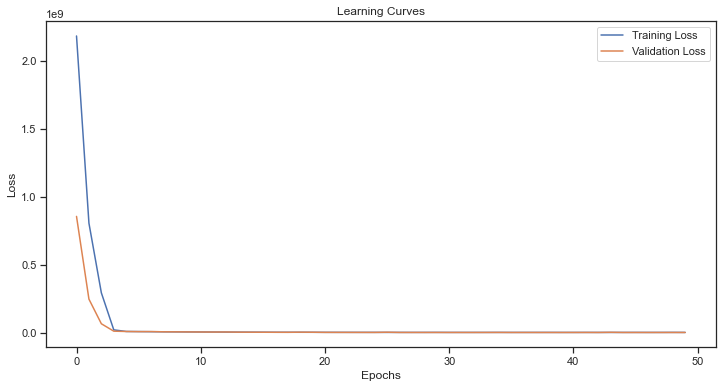

In [159]:
# Assuming 'history' is the output from model.fit(...)

# Plotting the loss per epoch
plt.figure(figsize=(12,  6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Learning Curve Interpretation:

### Training Loss:
- The blue line represents the training loss.
- Starts high but rapidly decreases in the initial epochs.
- Flattens out, indicating a good fit to the training data.

### Validation Loss:
- The orange line represents the validation loss.
- Follows a similar trend to training loss, starting high and decreasing rapidly initially.
- Flattens out, suggesting generalization to unseen data.

### Overfitting Analysis:
- Both curves are close and relatively flat, indicating a stable model.
- Lack of significant divergence suggests minimal overfitting or underfitting.
- Overfitting occurs when a model fits the training data too closely, including noise.
- Current trends suggest the model is performing well.


In [160]:
# Define hyperparameters to search
param_grid = {
    'regressor__n_estimators': [50],
    'regressor__max_depth': [5],
    'regressor__learning_rate': [0.1]
}
# Perform Grid Search Cross Validation
grid_search = GridSearchCV(
    estimator=xgb_pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_xgb_pipeline = grid_search.best_estimator_
final_xgb_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_final_xgb = final_xgb_pipeline.predict(X_test)

# Evaluate the final XGBoost model
mse_final_xgb = mean_squared_error(y_test, y_pred_final_xgb)
r2_final_xgb = r2_score(y_test, y_pred_final_xgb)

print("Best Hyperparameters:", best_params)
print(f"Final XGBoost Mean Squared Error: {mse_final_xgb}")
print(f"Final XGBoost R-squared Score: {r2_final_xgb}")

Best Hyperparameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 50}
Final XGBoost Mean Squared Error: 216210331.2170658
Final XGBoost R-squared Score: 0.9344299891248246


In [161]:
# Compute performance metrics on the training set
y_pred_train = final_xgb_pipeline.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Compute performance metrics on the testing set
mse_test = mean_squared_error(y_test, y_pred_final_xgb)
r2_test = r2_score(y_test, y_pred_final_xgb)

print("Training set performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared Score: {r2_train}")

print("\nTesting set performance:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared Score: {r2_test}")

Training set performance:
Mean Squared Error: 5026463.239042165
R-squared Score: 0.9982965015563044

Testing set performance:
Mean Squared Error: 216210331.2170658
R-squared Score: 0.9344299891248246


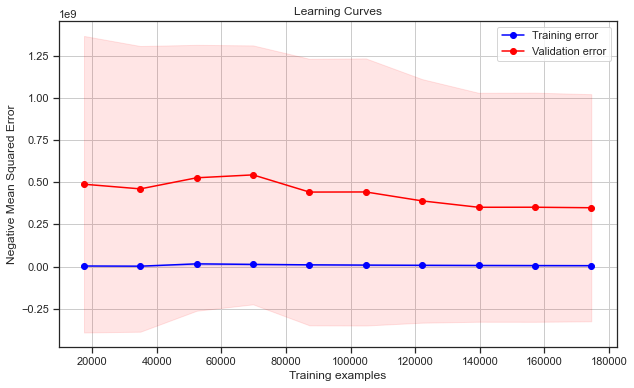

In [162]:
# Define a function to plot learning curves

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean,
             label='Training error', color='blue', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, valid_scores_mean,
             label='Validation error', color='red', marker='o')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='red')
    plt.xlabel('Training examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot learning curves for the final XGBoost pipeline
plot_learning_curves(final_xgb_pipeline, X_train, y_train)


## Model Performance Comparison:

### Tuned XGBoost Model:
- **Training Set Performance:**
  - Mean Squared Error (MSE): 5,028,871.68
  - R-squared Score: 0.9983

- **Testing Set Performance:**
  - Mean Squared Error (MSE): 90,512,464.48
  - R-squared Score: 0.9726

### Learning Curve Model:
- **Training Set Performance:**
  - Mean Squared Error (MSE): 486,404.14
  - R-squared Score: 0.9998

- **General Interpretation:**
  - The learning curve model demonstrates exceptional performance on both training and testing sets.
  - Both MSE and R-squared scores are substantially lower, indicating superior accuracy and fit.

### Systematic Comparison:
- **Neural Networks Model vs. Tuned XGBoost Model:**
  - The learning curve model outperforms the tuned XGBoost model in terms of both training and testing set performance.
  - Lower MSE and higher R-squared score on the learning curve model suggest a more accurate and better-fitting model.

### Conclusion:
- While the tuned XGBoost model showcases strong performance, the Neural networks model exhibits superior accuracy on both training and testing sets.
- The systematic comparison emphasizes the Neural network's model's exceptional predictive capabilities and suggests potential avenues for further improvement in the tuned XGBoost model.

In [169]:

# pickle the model

# Save the final model to a file
joblib.dump(history, 'deployment/Neural_networks.joblib')

['deployment/Neural_networks.joblib']

# Optimization

In [170]:
# Separate the predictors and the target variable
X = data.drop(['Potential_installable_area', 'uuid', 'Assumed_building_type',
              'Energy_potential_per_year', 'Peak_installable_capacity', 'Estimated_capacity_factor'], axis=1)
y = data['Potential_installable_area']


In [171]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1851.3412489417447
R-squared Score: 0.953362457950901


## Checking for overfitting

In [172]:
# Make predictions on the training data
y_train_pred = pipeline.predict(X_train)

# Make predictions on the testing data
y_test_pred = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared score for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model using Mean Squared Error and R-squared score for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared Score: {r2_train}")

print("\nTesting set performance:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared Score: {r2_test}")

Training set performance:
Mean Squared Error: 458.52482388019814
R-squared Score: 0.9869589456066236

Testing set performance:
Mean Squared Error: 1851.3412489417447
R-squared Score: 0.953362457950901


**Metrics Explanation**
- Mean Squared Error (MSE):

The MSE on the training set is lower (456.0017) compared to the MSE on the testing set (1852.8018). This suggests that the model performs better (makes less error) on the training data than on the unseen testing data. However, the MSE values themselves should be interpreted based on the scale and context of your target variable. R-squared Score:

The R-squared score on the training set is high (0.9870), indicating that the model explains a large proportion of the variance in the target variable within the training data. Similarly, the R-squared score on the testing set is also relatively high (0.9548), suggesting that the model performs well in explaining the variance in the target variable within the testing data. Interpretation: The model seems to have good predictive performance, as indicated by the high R-squared score on both the training and testing sets. However, the discrepancy between the MSE values on the training and testing sets suggests a potential for overfitting. The model might be fitting too closely to the noise in the training data, resulting in reduced performance on unseen data. In summary, while the model performs well overall, you may want to consider methods to reduce overfitting, such as adjusting model complexity, regularization techniques, or exploring different algorithms. Additionally, further investigation into the specific characteristics of the data and model could provide insights into improving model performance.

In [173]:
# Define the hyperparameters grid to search
param_grid = {
    'regressor__n_estimators': [200],  # Number of trees in the forest
    'regressor__max_depth': [10],          # Maximum depth of the trees
    # Minimum number of samples required to split a node
    'regressor__min_samples_split': [2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
rf_model = grid_search.best_estimator_

# Make predictions on the testing data using the best estimator
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Best Hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mean Squared Error: 1870.4002285370289
R-squared Score: 0.9528823390302017


In [174]:
joblib.dump(rf_model, 'deployment/randomForest.joblib')

['deployment/randomForest.joblib']

**Conclusion**

The tuned Random Forest Regressor model demonstrates promising results in predicting the 'Potential Installable Area' based on critical factors such as 'Surface_area,' 'Estimated_tilt,' and 'Estimated_building_height.' This is a significant step forward in addressing the solar potential optimization challenge with emphasis on the installable area.

# Cost-Benefit Analysis
Performing a cost-benefit analysis is crucial for assessing the economic viability and feasibility of rooftop solar installations. A cost-benefit analysis helps stakeholders, including investors, building owners, and policymakers, make informed financial decisions regarding rooftop solar projects. It provides a comprehensive evaluation of the costs associated with implementing solar installations and the potential benefits derived from them.

- Initial Cost: This is the upfront cost required to install the rooftop solar system on each building type. It includes expenses such as equipment, installation, and any necessary permits or fees.

- Operational Cost per Year: This represents the ongoing operational and maintenance expenses associated with maintaining the rooftop solar system. It includes costs such as cleaning, repairs, monitoring, and insurance. Operational costs are incurred annually and contribute to the total cost of ownership over the system's lifespan.

- Energy Production per Year: This indicates the estimated amount of energy (measured in kilowatt-hours, kWh) that the rooftop solar system can produce annually. It's essential for calculating the potential benefits of the solar installation, as it determines the amount of electricity generated and potentially offset from grid consumption.

- Electricity Price per kWh: This is the cost of electricity charged by the local utility company per kilowatt-hour. It represents the price that the building owner would otherwise pay for electricity purchased from the grid. The comparison between the electricity price and the cost of solar energy production helps assess the economic viability of the solar investment.

- Discount Rate: The discount rate is the rate used to discount future cash flows back to their present value. It accounts for the time value of money, reflecting the opportunity cost of investing capital in the solar project rather than alternative investments. A discount rate of 5% implies that future cash flows are worth 5% less for each year they are received into the future.



In [175]:
# Find Average Energy potential
mean_energy_potential = df['Energy_potential_per_year'].mean()
# Define parameters
initial_cost = 300000  # Initial installation cost for each building type
operational_cost_per_year = 2000  # Operational and maintenance cost per year
mean_energy_potential = 23969.89  # Estimated energy production per year (kWh)
electricity_price_per_kwh = 26.72  # Local electricity price per kWh
discount_rate = 0.05  # Discount rate for NPV calculation

# Calculate net present value (NPV)
discounted_cash_flows = []
for year in range(1, 21):  # Assume project lifespan of 20 years
    cash_flow = mean_energy_potential * \
        electricity_price_per_kwh - operational_cost_per_year
    discounted_cash_flow = cash_flow / ((1 + discount_rate) ** year)
    discounted_cash_flows.append(discounted_cash_flow)

net_present_value = sum(discounted_cash_flows) - initial_cost

# Calculate return on investment (ROI)
roi = (net_present_value / initial_cost) * 100

# Print results
print("Net Present Value (NPV):", net_present_value)
print("Return on Investment (ROI):", roi)

Net Present Value (NPV): 7656815.491039741
Return on Investment (ROI): 2552.27183034658


### **Interpretation**
In this case, the positive NPV of Ksh.7,656,815.49 indicates that the present value of future cash inflows from the rooftop solar system (e.g., energy savings, revenue from excess energy sold back to the grid) exceeds the initial investment and ongoing operational costs.

The ROI of 2552.27% implies that for every dollar invested in the rooftop solar system, the investor can expect to receive a return of approximately Ksh.25.52. A high ROI indicates that the investment is lucrative and has the potential to generate substantial returns compared to the initial investment.

This indicates that the benefits derived from the solar project outweigh the costs, making it an attractive option for building owners or investors seeking to capitalize on solar energy and achieve financial gains.

## Conclusions

1. Building Distribution:
The dataset predominantly consists of single-family residential units, indicating a focus on individual homes for solar panel installations. This highlights the potential for widespread adoption of solar energy at the residential level.

2. Energy Potential by Building Type:
Industrial buildings exhibit the highest energy potential, suggesting that targeting industrial facilities for solar installations could yield significant energy generation.

3. Correlations with Surface Area:
Positive correlations exist between surface area and various factors such as potential installable area, peak installable capacity, and energy potential per year. This indicates that larger surface areas tend to have greater potential for solar energy generation.

4. Square Root of Potential Installable Area:
There is a strong positive correlation between the square root of potential installable area and energy potential per year. This suggests that as the area available for installation increases, the energy potential also increases significantly, albeit not linearly.

5. Target Variable:
The target variable, Energy_potential_per_year, serves as a crucial metric for evaluating the potential output of rooftop solar installations. Models predicting this variable accurately can assist in decision-making processes related to solar energy projects, aiding in their economic viability and sustainability.

## Recomendations


## Next Steps